<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="font-family:newtimeroman;font-size:200%;text-align:left;border-radius:9px 9px;">CONTENTS</p> 

* [1. Importing and Loading Dataset](#1)
    
* [2. Data Overview](#2)
    
* [3. Data Processing](#3)

* [4. Data Analysis](#4)

* [5. Data Analysis](#5)

<a id="1"></a>

## <b>1 <span style='color:#F4D940'>|</span> Importing and Loading Dataset</b>


In [288]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords, wordnet
import re
import string

import warnings
warnings.filterwarnings('ignore')

In [289]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kevin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [290]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kevin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [291]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\kevin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [292]:
import time
startTime = time.time()

In [293]:
data = pd.read_csv('alldata_1_for_kaggle.csv', encoding='latin1')

In [294]:
df = data.copy()

---

<a id="2"></a>

## <b>2 <span style='color:#F4D940'>|</span> Data Overview</b>

In [295]:
df.head()

,Unnamed: 0,0,a
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,4,Thyroid_Cancer,This study aimed to investigate serum matrix ...


In [296]:
df.drop(columns='Unnamed: 0', inplace=True)

In [297]:
df.rename(columns={'0':'Target','a':'Text'}, inplace=True)

In [298]:
df.head()

,Target,Text
0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,Thyroid_Cancer,This study aimed to investigate serum matrix ...


In [299]:
df.tail()

,Target,Text
7565,Colon_Cancer,we report the case of a 24yearold man who pres...
7566,Colon_Cancer,among synchronous colorectal cancers scrcs rep...
7567,Colon_Cancer,the heterogeneity of cancer cells is generally...
7568,Colon_Cancer,"""adipogenesis is the process through which mes..."
7569,Colon_Cancer,the periparturient period is one of the most c...


In [300]:
df_copy = df

In [301]:
print(df.info())
print('-'*20+'Types of cancer'+'-'*20)
print(df['Target'].unique())
print('-'*20+'Count for each type'+'-'*20)
print(df['Target'].value_counts())
print('-'*20+'Null count'+'-'*20)
print(df.isnull().sum())
print('-'*20+'Duplicate count'+'-'*20)
print(df['Text'].duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7570 entries, 0 to 7569
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Target  7570 non-null   object
 1   Text    7570 non-null   object
dtypes: object(2)
memory usage: 118.4+ KB
None
--------------------Types of cancer--------------------
['Thyroid_Cancer' 'Colon_Cancer' 'Lung_Cancer']
--------------------Count for each type--------------------
Target
Thyroid_Cancer    2810
Colon_Cancer      2580
Lung_Cancer       2180
Name: count, dtype: int64
--------------------Null count--------------------
Target    0
Text      0
dtype: int64
--------------------Duplicate count--------------------
6574


In [302]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7565     True
7566     True
7567     True
7568     True
7569     True
Length: 7570, dtype: bool

In [303]:
duplicate_count = df.duplicated().sum()
row_count = df.shape[0]
print(f'The percentage of duplicated name: {duplicate_count/row_count*100:.2f}%')

The percentage of duplicated name: 86.84%


### Remove Dupliactes

In [304]:
df = df.drop_duplicates(subset=['Text']).reset_index(drop=True)

In [305]:
df['Text'].duplicated().sum()

0

In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Target  996 non-null    object
 1   Text    996 non-null    object
dtypes: object(2)
memory usage: 15.7+ KB


In [307]:
# plt.figure(figsize=(11, 7))

# plt.subplot(1,2,1)
# sns.barplot(data=df, x=df['Target'].unique(), y=df['Target'].value_counts())

# plt.subplot(1,2,2)
# plt.pie(df.groupby('Target')['Target'].count(),autopct="%.1f%%",explode=(0.01,0.01,0.01),labels=['Colon_Cancer', 'Lung_Cancer', 'Thyroid_Cancer'])

# plt.suptitle('Cancer Types Distribution', color='blue', fontsize=15)
# plt.show()

In [308]:
df['Target'].value_counts()

Target
Lung_Cancer       452
Thyroid_Cancer    283
Colon_Cancer      261
Name: count, dtype: int64

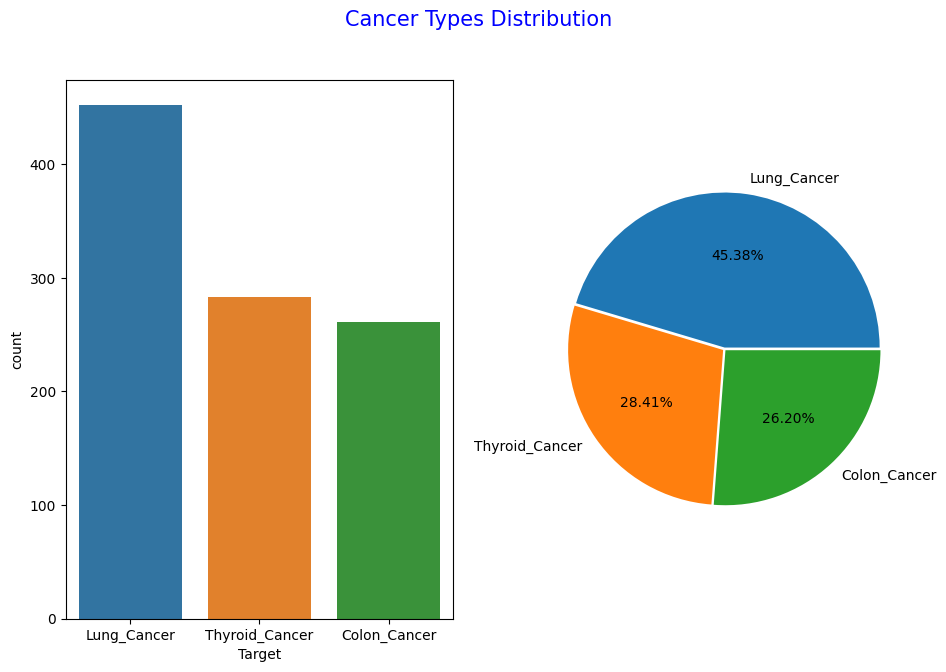

In [309]:
fig, axes = plt.subplots(1, 2, figsize=(11, 7))
sns.barplot(data=df, x=df['Target'].value_counts().index, y=df['Target'].value_counts(), ax=axes[0])
axes[1].pie(df['Target'].value_counts(), labels=df['Target'].value_counts().keys(), autopct='%1.2f%%',explode=(0.01,0.01,0.01)) 
plt.suptitle('Cancer Types Distribution', color='blue', fontsize=15)
plt.show() 

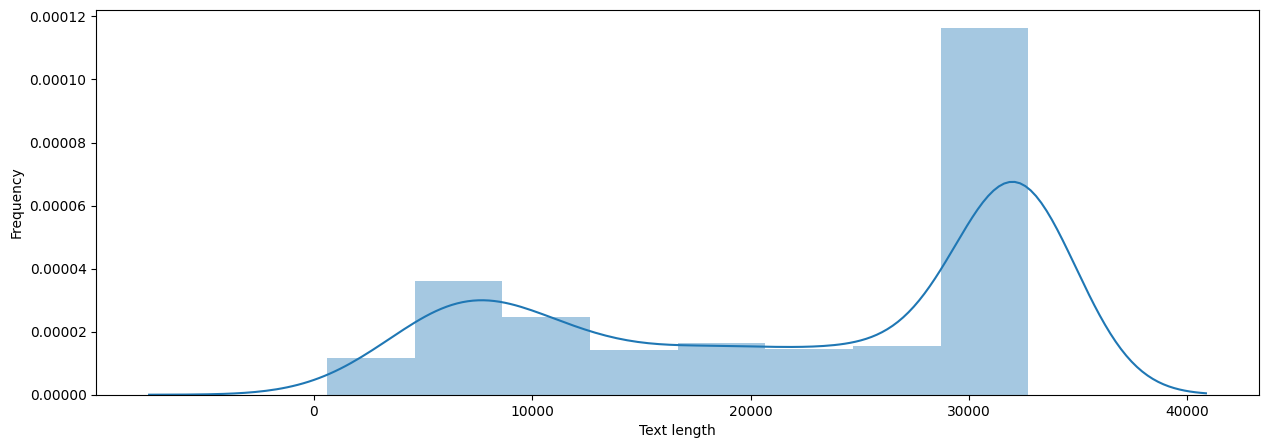

In [310]:
df['text_len'] = df['Text'].str.len()
plt.figure(figsize=(15,5))
ax = sns.distplot(df['text_len'])
ax.set(xlabel='Text length', ylabel='Frequency')
plt.show()

#### **KDE (Kernel Density Estimation)**
- A technique for visualizing the probability distribution of a dataset. It creates a smooth curve that represents the likelihood of encountering a particular data point within your dataset.

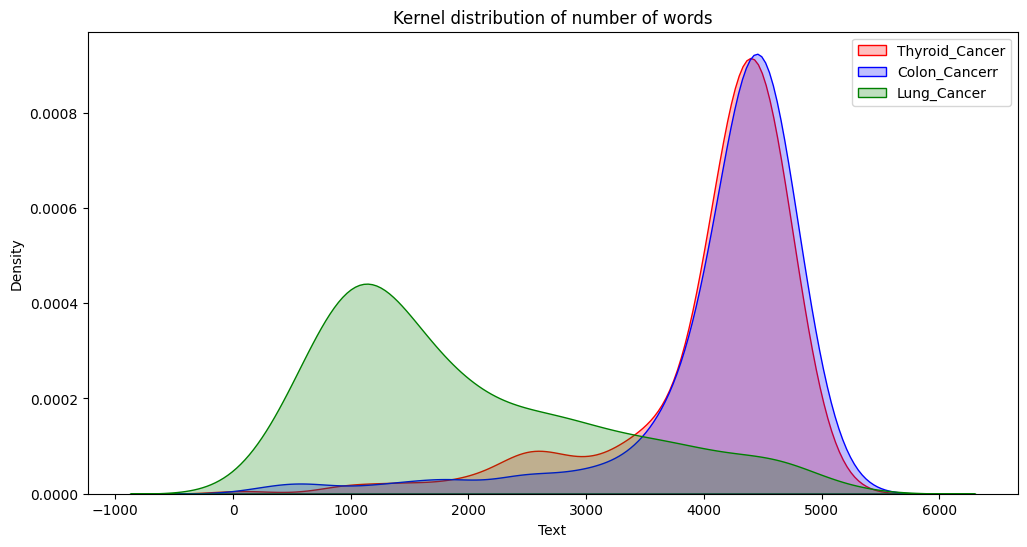

In [311]:
num_1 = df[df['Target']== 'Thyroid_Cancer']['Text'].apply(lambda x: len(x.split()))
num_2 = df[df['Target']== 'Colon_Cancer']['Text'].apply(lambda x: len(x.split()))
num_3 = df[df['Target']== 'Lung_Cancer']['Text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(12,6))
sns.kdeplot(num_1, shade=True, color = 'red').set_title('Kernel distribution of number of words')
sns.kdeplot(num_2, shade=True, color = 'blue')
sns.kdeplot(num_3, shade=True, color = 'green')

plt.legend(labels=['Thyroid_Cancer', 'Colon_Cancerr', 'Lung_Cancer'])
plt.show()

---

<a id="3"></a>

## <b>3 <span style='color:#F4D940'>|</span> Data Processing</b>

In [313]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not",
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
df['Text']=df['Text'].apply(lambda x:expand_contractions(x))

In [314]:
import unidecode

#defining the function to remove useless items from text
def remove_punctuation(text):
    # remove 
    text = re.sub('\[.*?\]', '', text)
    # remove links
    text = re.sub('https?://\S+|www\.\S+', '', text)
    # remove html tags
    text = re.sub('<.*?>+', '', text)
    # remove breaklines
    text = re.sub('\n', '', text)
    # remove numbers
    text = re.sub('\w*\d\w*', '', text)
    # remove accent
    text = unidecode.unidecode(text)
    # remove punctuations
    text = "".join([i for i in text if i not in string.punctuation])
    
    return text

df['cleaned']= df['Text'].apply(lambda x:remove_punctuation(x))
df.head()

,Target,Text,text_len,cleaned
0,Thyroid_Cancer,Thyroid surgery in children in a single insti...,20707,Thyroid surgery in children in a single insti...
1,Thyroid_Cancer,""" The adopted strategy was the same as that us...",17018,The adopted strategy was the same as that use...
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...,21622,coronary arterybypass grafting thrombosis ibri...
3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...,13860,Solitary plasmacytoma SP of the skull is an u...
4,Thyroid_Cancer,This study aimed to investigate serum matrix ...,23696,This study aimed to investigate serum matrix ...


In [315]:
# convert to lowercase
df['lowercase']= df['cleaned'].apply(lambda x: x.lower())
df.head()

,Target,Text,text_len,cleaned,lowercase
0,Thyroid_Cancer,Thyroid surgery in children in a single insti...,20707,Thyroid surgery in children in a single insti...,thyroid surgery in children in a single insti...
1,Thyroid_Cancer,""" The adopted strategy was the same as that us...",17018,The adopted strategy was the same as that use...,the adopted strategy was the same as that use...
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...,21622,coronary arterybypass grafting thrombosis ibri...,coronary arterybypass grafting thrombosis ibri...
3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...,13860,Solitary plasmacytoma SP of the skull is an u...,solitary plasmacytoma sp of the skull is an u...
4,Thyroid_Cancer,This study aimed to investigate serum matrix ...,23696,This study aimed to investigate serum matrix ...,this study aimed to investigate serum matrix ...


In [316]:
#defining function for tokenization
def tokenization(text):
    # tokens = re.split('W+',text)
    return word_tokenize(text)
#applying function to the column
df['tokenied'] = df['lowercase'].apply(lambda x: tokenization(x))
df.head()

,Target,Text,text_len,cleaned,lowercase,tokenied
0,Thyroid_Cancer,Thyroid surgery in children in a single insti...,20707,Thyroid surgery in children in a single insti...,thyroid surgery in children in a single insti...,"[thyroid, surgery, in, children, in, a, single..."
1,Thyroid_Cancer,""" The adopted strategy was the same as that us...",17018,The adopted strategy was the same as that use...,the adopted strategy was the same as that use...,"[the, adopted, strategy, was, the, same, as, t..."
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...,21622,coronary arterybypass grafting thrombosis ibri...,coronary arterybypass grafting thrombosis ibri...,"[coronary, arterybypass, grafting, thrombosis,..."
3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...,13860,Solitary plasmacytoma SP of the skull is an u...,solitary plasmacytoma sp of the skull is an u...,"[solitary, plasmacytoma, sp, of, the, skull, i..."
4,Thyroid_Cancer,This study aimed to investigate serum matrix ...,23696,This study aimed to investigate serum matrix ...,this study aimed to investigate serum matrix ...,"[this, study, aimed, to, investigate, serum, m..."


In [317]:
# # Simple custom wordcloud
# stopwords = list(STOPWORDS)
# stopwords.extend(['et', 'al', 'et', 'a0al', 'fig'])
# stopwords.extend(list(string.ascii_lowercase))

# Advance custom wordcloud
with open('gist_stopwords.txt', 'r') as file:
    data = file.read().rstrip()
stopwords = list(STOPWORDS)
#stopwords = []
stopwords.extend(data.split(sep=','))
stopwords.extend(['fig','figure'])
#stopwords.extend(['patient', 'study', 'treatment', 'cell', 'expression', 'data', 'reported'])
stopwords = list(dict.fromkeys(stopwords))

def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

df['no_stopwords'] = df['tokenied'].apply(lambda x:remove_stopwords(x))
df.head()

,Target,Text,text_len,cleaned,lowercase,tokenied,no_stopwords
0,Thyroid_Cancer,Thyroid surgery in children in a single insti...,20707,Thyroid surgery in children in a single insti...,thyroid surgery in children in a single insti...,"[thyroid, surgery, in, children, in, a, single...","[thyroid, surgery, children, single, instituti..."
1,Thyroid_Cancer,""" The adopted strategy was the same as that us...",17018,The adopted strategy was the same as that use...,the adopted strategy was the same as that use...,"[the, adopted, strategy, was, the, same, as, t...","[adopted, strategy, prior, years, based, exclu..."
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...,21622,coronary arterybypass grafting thrombosis ibri...,coronary arterybypass grafting thrombosis ibri...,"[coronary, arterybypass, grafting, thrombosis,...","[coronary, arterybypass, grafting, thrombosis,..."
3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...,13860,Solitary plasmacytoma SP of the skull is an u...,solitary plasmacytoma sp of the skull is an u...,"[solitary, plasmacytoma, sp, of, the, skull, i...","[solitary, plasmacytoma, skull, uncommon, clin..."
4,Thyroid_Cancer,This study aimed to investigate serum matrix ...,23696,This study aimed to investigate serum matrix ...,this study aimed to investigate serum matrix ...,"[this, study, aimed, to, investigate, serum, m...","[study, aimed, investigate, serum, matrix, met..."


**For Kaggle**

In [318]:
# import nltk
# import subprocess

# # Download and unzip wordnet
# try:
#     nltk.data.find('wordnet.zip')
# except:
#     nltk.download('wordnet', download_dir='/kaggle/working/')
#     command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
#     subprocess.run(command.split())
#     nltk.data.path.append('/kaggle/working/')

# # Now you can import the NLTK resources as usual
# from nltk.corpus import wordnet

In [319]:
# def pos_tagging(text):
#     pos_tag_text = pos_tag(text)
#     return pos_tag_text
# df['temp'] = [' '.join(l) for l in df['no_stopwords']]
# df['pos_tagged'] = df['temp'].apply(lambda x: pos_tagging(x.split()))
# df.drop(columns=['temp'], inplace=True)
# df.head()

In [320]:
# def get_wordnet_pos(tag):
# 	if tag.startswith('J'):
# 		return wordnet.ADJ
# 	elif tag.startswith('V'):
# 		return wordnet.VERB
# 	elif tag.startswith('N'):
# 		return wordnet.NOUN
# 	elif tag.startswith('R'):
# 		return wordnet.ADV
# 	else:
# 		return wordnet.NOUN

# df['wordnet_pos_tags'] = df['pos_tagged'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
# df.head()

In [321]:
lemmatizer = WordNetLemmatizer()
# df['lemmatized'] = df['wordnet_pos_tags'].apply(lambda x: [lemmatizer.lemmatize(word, tag) for word, tag in x])

# def wordnet_lemmatizer(text):
#     lemm_text = [lemmatizer.lemmatize(word) for word in text]
#     return lemm_text
df['lemmatized'] = df['no_stopwords'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

df.head()

,Target,Text,text_len,cleaned,lowercase,tokenied,no_stopwords,lemmatized
0,Thyroid_Cancer,Thyroid surgery in children in a single insti...,20707,Thyroid surgery in children in a single insti...,thyroid surgery in children in a single insti...,"[thyroid, surgery, in, children, in, a, single...","[thyroid, surgery, children, single, instituti...","[thyroid, surgery, child, single, institution,..."
1,Thyroid_Cancer,""" The adopted strategy was the same as that us...",17018,The adopted strategy was the same as that use...,the adopted strategy was the same as that use...,"[the, adopted, strategy, was, the, same, as, t...","[adopted, strategy, prior, years, based, exclu...","[adopted, strategy, prior, year, based, exclus..."
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...,21622,coronary arterybypass grafting thrombosis ibri...,coronary arterybypass grafting thrombosis ibri...,"[coronary, arterybypass, grafting, thrombosis,...","[coronary, arterybypass, grafting, thrombosis,...","[coronary, arterybypass, grafting, thrombosis,..."
3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...,13860,Solitary plasmacytoma SP of the skull is an u...,solitary plasmacytoma sp of the skull is an u...,"[solitary, plasmacytoma, sp, of, the, skull, i...","[solitary, plasmacytoma, skull, uncommon, clin...","[solitary, plasmacytoma, skull, uncommon, clin..."
4,Thyroid_Cancer,This study aimed to investigate serum matrix ...,23696,This study aimed to investigate serum matrix ...,this study aimed to investigate serum matrix ...,"[this, study, aimed, to, investigate, serum, m...","[study, aimed, investigate, serum, matrix, met...","[study, aimed, investigate, serum, matrix, met..."


In [322]:
df['final_text'] = [' '.join(l) for l in df['lemmatized']]
df.head()

,Target,Text,text_len,cleaned,lowercase,tokenied,no_stopwords,lemmatized,final_text
0,Thyroid_Cancer,Thyroid surgery in children in a single insti...,20707,Thyroid surgery in children in a single insti...,thyroid surgery in children in a single insti...,"[thyroid, surgery, in, children, in, a, single...","[thyroid, surgery, children, single, instituti...","[thyroid, surgery, child, single, institution,...",thyroid surgery child single institution osama...
1,Thyroid_Cancer,""" The adopted strategy was the same as that us...",17018,The adopted strategy was the same as that use...,the adopted strategy was the same as that use...,"[the, adopted, strategy, was, the, same, as, t...","[adopted, strategy, prior, years, based, exclu...","[adopted, strategy, prior, year, based, exclus...",adopted strategy prior year based exclusive qu...
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...,21622,coronary arterybypass grafting thrombosis ibri...,coronary arterybypass grafting thrombosis ibri...,"[coronary, arterybypass, grafting, thrombosis,...","[coronary, arterybypass, grafting, thrombosis,...","[coronary, arterybypass, grafting, thrombosis,...",coronary arterybypass grafting thrombosis ibri...
3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...,13860,Solitary plasmacytoma SP of the skull is an u...,solitary plasmacytoma sp of the skull is an u...,"[solitary, plasmacytoma, sp, of, the, skull, i...","[solitary, plasmacytoma, skull, uncommon, clin...","[solitary, plasmacytoma, skull, uncommon, clin...",solitary plasmacytoma skull uncommon clinical ...
4,Thyroid_Cancer,This study aimed to investigate serum matrix ...,23696,This study aimed to investigate serum matrix ...,this study aimed to investigate serum matrix ...,"[this, study, aimed, to, investigate, serum, m...","[study, aimed, investigate, serum, matrix, met...","[study, aimed, investigate, serum, matrix, met...",study aimed investigate serum matrix metallopr...


In [323]:
df_final = df[['Target','Text','final_text']]
df_final.head()

,Target,Text,final_text
0,Thyroid_Cancer,Thyroid surgery in children in a single insti...,thyroid surgery child single institution osama...
1,Thyroid_Cancer,""" The adopted strategy was the same as that us...",adopted strategy prior year based exclusive qu...
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ibri...
3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...,solitary plasmacytoma skull uncommon clinical ...
4,Thyroid_Cancer,This study aimed to investigate serum matrix ...,study aimed investigate serum matrix metallopr...


In [324]:
df_final.tail()

,Target,Text,final_text
991,Lung_Cancer,"""Missense mutation distribution in the exons a...",missense mutation distribution exon functional...
992,Lung_Cancer,"""versus gemcitabine/carboplatin in advanced no...",versus gemcitabinecarboplatin advanced nonsmal...
993,Thyroid_Cancer,Keloids are pathological scars that grow over...,keloid pathological scar grow time extend init...
994,Colon_Cancer,the anization of cells into multiple membranou...,anization cell multiple membranous compartment...
995,Colon_Cancer,several immunotherapeutic strategies that harn...,immunotherapeutic strategy harness exquisite i...


In [325]:
df_final.to_csv('dataset_final_saved.csv', index=False)

---

<a id="4"></a>

## <b>4 <span style='color:#F4D940'>|</span> Data Analysis</b>

In [326]:
# df['Text_len'] = df['Text'].apply(lambda x:len(x))
# df['word_count'] = df['Text'].apply(lambda x: len(x.split()))

In [327]:
# custom made function to return the top n trigrams
def get_top_ngrams(x, count, top_n=25):
    vec = CountVectorizer(ngram_range=(count, count), stop_words=stopwords).fit(x)
    bag_of_words = vec.transform(x)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:top_n]

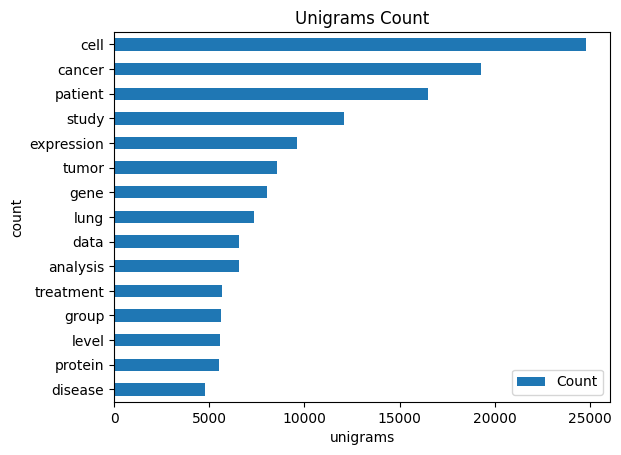

In [328]:
common_words = get_top_ngrams(df['final_text'], 1, 15)
df1 = pd.DataFrame(common_words, columns = ['Unigram Text' , 'Count'])
df1.set_index('Unigram Text', drop=True, inplace=True)

df1.sort_values('Count', ascending=True).plot.barh()
plt.xlabel('unigrams')
plt.ylabel('count')
plt.title('Unigrams Count')
plt.show()

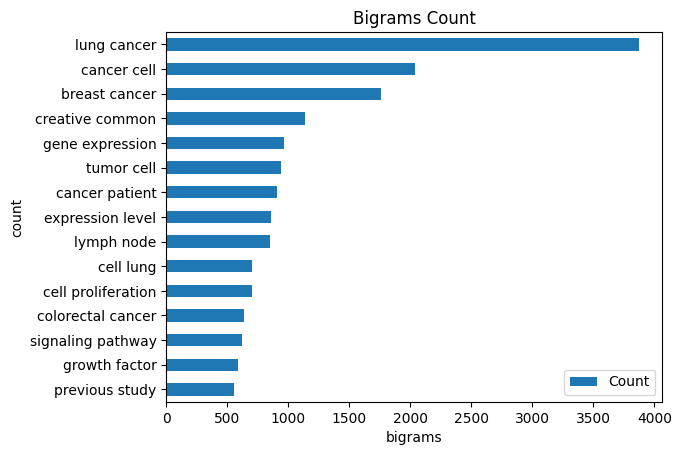

In [329]:
common_words = get_top_ngrams(df['final_text'], 2, 15)
df2 = pd.DataFrame(common_words, columns = ['Bigrams Text' , 'Count'])
df2.set_index('Bigrams Text', drop=True, inplace=True)

df2.sort_values('Count', ascending=True).plot.barh()
plt.xlabel('bigrams')
plt.ylabel('count')
plt.title('Bigrams Count')
plt.show()

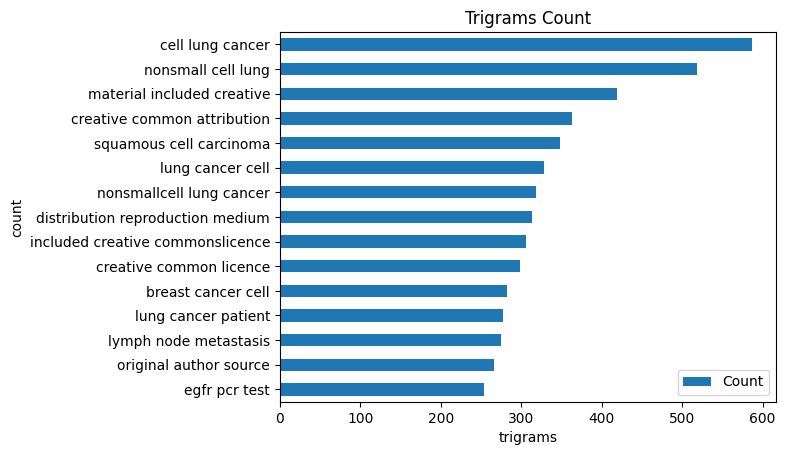

In [330]:
common_words = get_top_ngrams(df['final_text'], 3, 15)
df3 = pd.DataFrame(common_words, columns = ['Trigrams Text' , 'Count'])
df3.set_index('Trigrams Text', drop=True, inplace=True)

df3.sort_values('Count', ascending=True).plot.barh()
plt.xlabel('trigrams')
plt.ylabel('count')
plt.title('Trigrams Count')
plt.show()

In [331]:
# one wordcloud after process
def wordcloud(target):
    wordcloud = WordCloud(stopwords=stopwords, background_color='white', width=2000, height=1000).generate(" ".join(df_final[df_final['Target']==target]['final_text']))
    plt.figure(1,figsize=(15, 15))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

In [332]:
# two wordclouds before and after process
def double_wordCloud(target):
    fig, axes = plt.subplots(1, 2, figsize=[20, 10])

    df_real = df[df['Target']==target]['Text']

    wordcloud1 = WordCloud(stopwords=stopwords,
                        background_color='white',
                        width=2500,
                        height=2000).generate(" ".join(df_real))

    axes[0].imshow(wordcloud1)
    axes[0].axis('off')
    axes[0].set_title('Before transformation')

    df_real = df[df['Target']==target]['final_text']

    wordcloud2 = WordCloud(stopwords=stopwords,
                        background_color='white',
                        width=2500,
                        height=2000).generate(" ".join(df_real))

    axes[1].imshow(wordcloud2)
    axes[1].axis('off')
    axes[1].set_title('After transformation')
    plt.suptitle(target, size=20, weight=1000,y=0.83)
    plt.show()

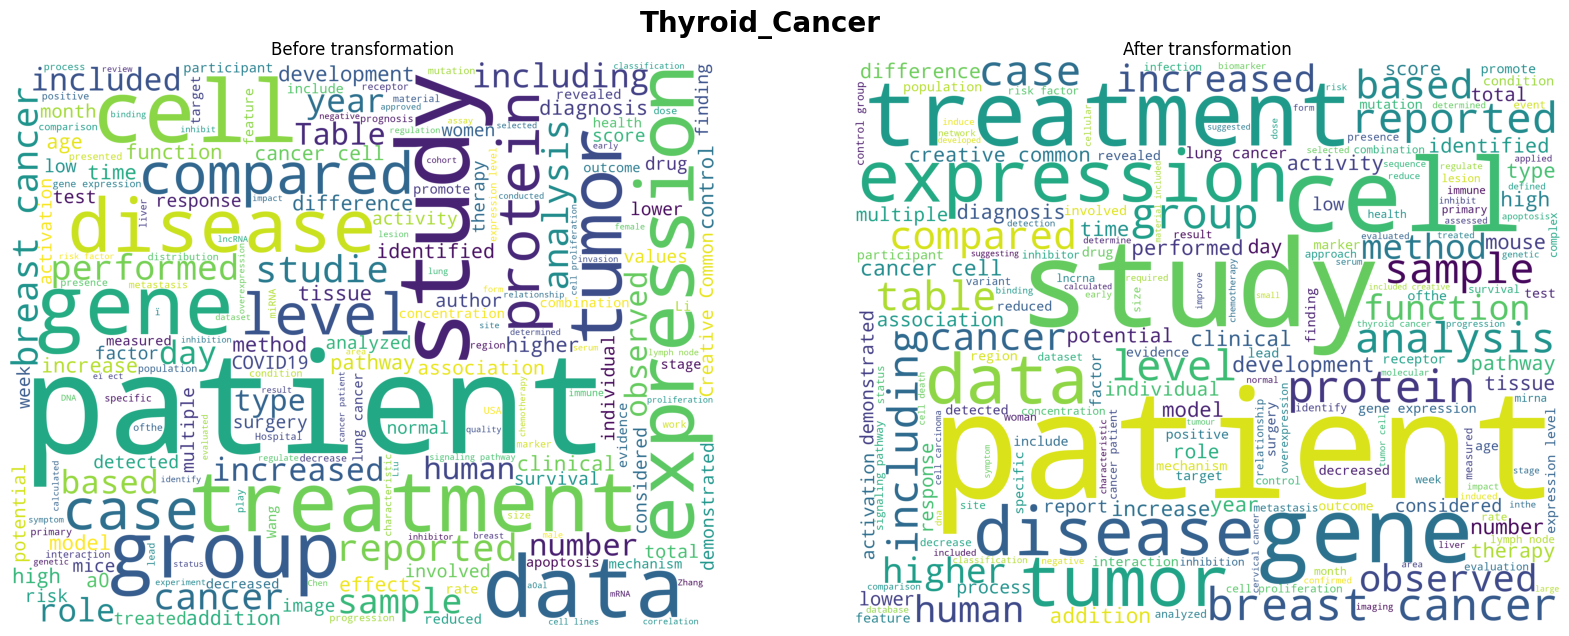

In [333]:
double_wordCloud('Thyroid_Cancer')
# wordcloud('Thyroid_Cancer')

**Wordcloud before using a custom stopwords list for thyroid cancer**<br/>
<img src=wordcloud_1.png alt="Alt text for the image" width="" height="500">

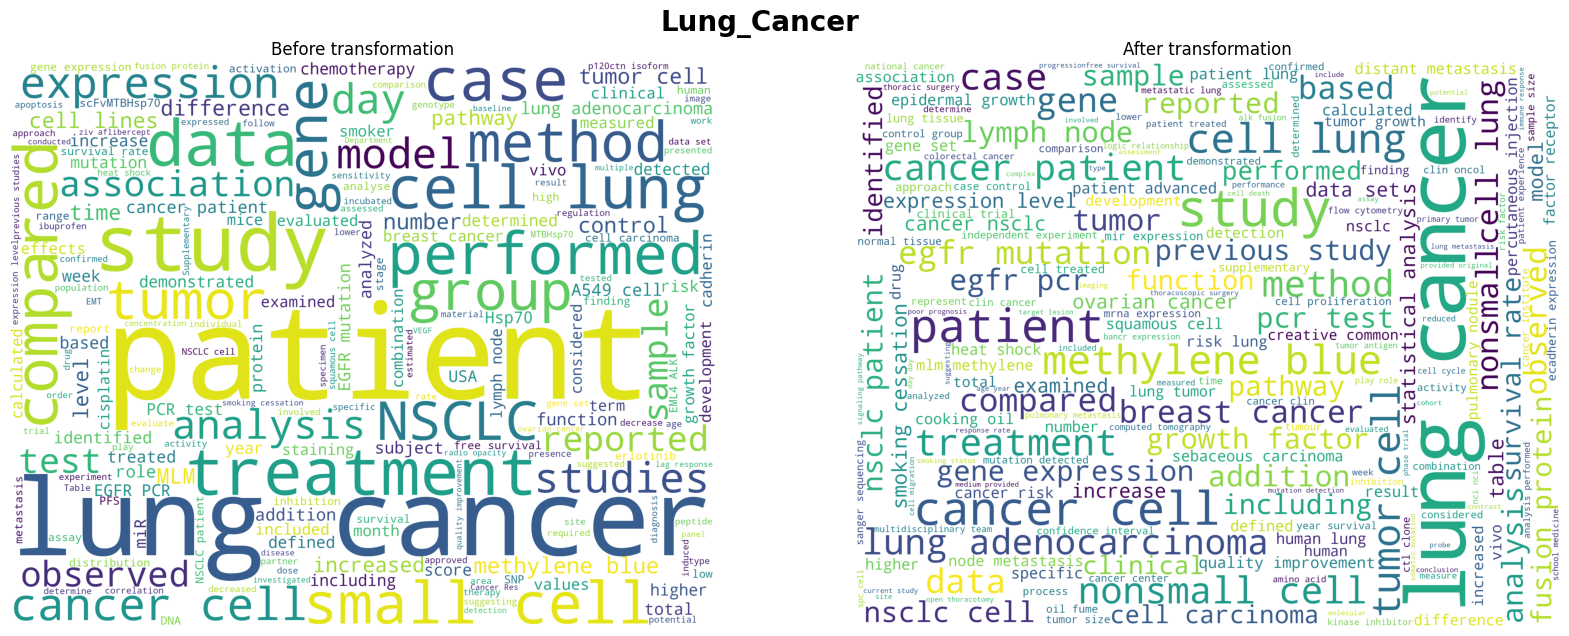

In [334]:
double_wordCloud('Lung_Cancer')
# wordcloud('Lung_Cancer')

**Wordcloud before using a custom stopwords list for lung cancer**<br/>
<img src=wordcloud_2.png alt="Alt text for the image" width="" height="500">

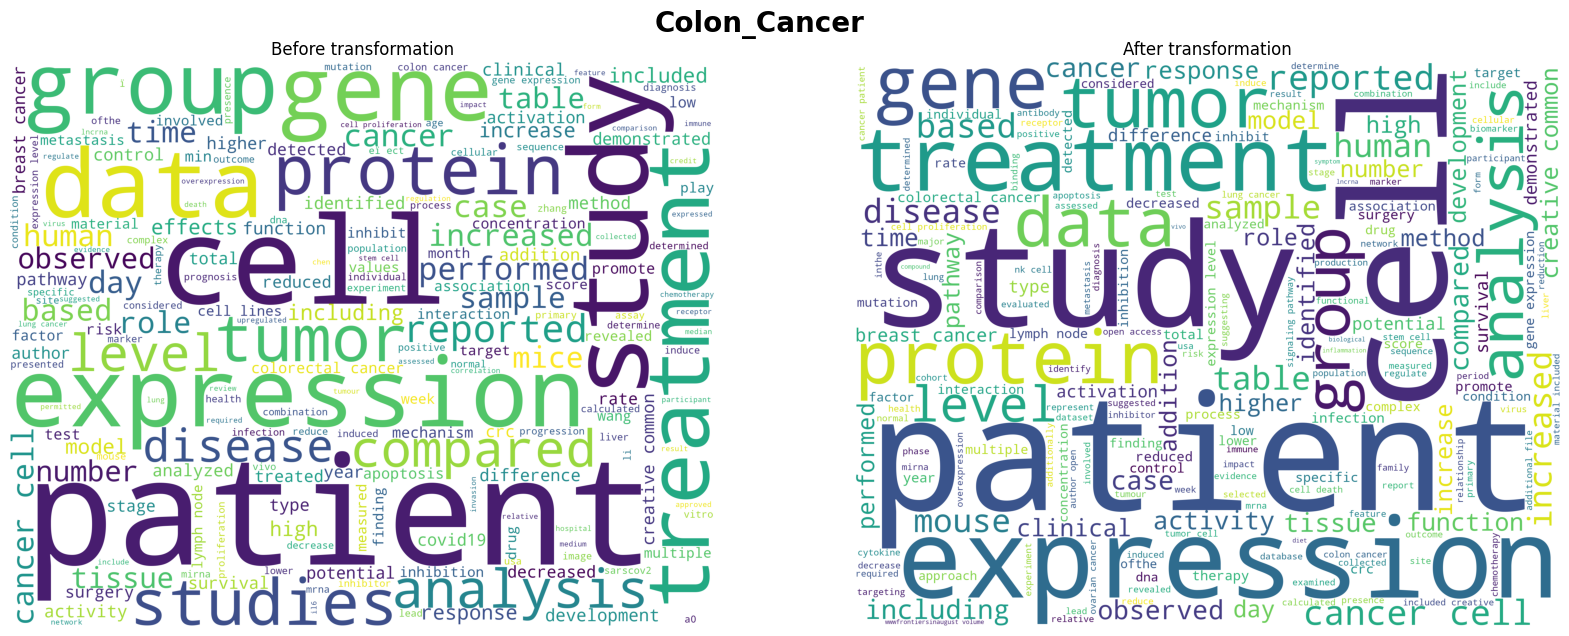

In [335]:
double_wordCloud('Colon_Cancer')
# wordcloud('Colon_Cancer')

**Wordcloud before using a custom stopwords list colon cancer**<br/>
<img src=wordcloud_3.png alt="Alt text for the image" width="" height="500">

**Side Notes**
- EGFR PCR: eGFR PCR stands for eGFR using the CKD-EPI (Chronic Kidney Disease Epidemiology Collaboration) method. This formula is used to estimate the glomerular filtration rate (eGFR) based on blood creatinine levels and other factors such as age, gender, and race.
- nsclc: non-small cell lung cancer
- Methylene blue: detection and treatment of lung cancer
- Breast Cancer & Thyroid Cancer: Women with a history of either or both are at a higher risk of developing the other.

**Future Development**
- Removing words that have high frequency (above 80%) or low frequency (below 20%)
- Try Applying POS tagging
- Use Deep Learning models instead of Machine Learning
- 

---

<a id="5"></a>

## <b>5 <span style='color:#F4D940'>|</span> Modeling and Evaluation</b>

In [336]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

In [337]:
df_model = df_final[['Target', 'final_text']]

In [338]:
X_train, X_test, y_train, y_test = train_test_split(df_model['final_text'], df_model['Target'], test_size = 0.2, random_state = 42, stratify=df_final['Target'])

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print("-"*20)
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (796,)
y_train shape: (796,)
--------------------
X_test shape: (200,)
y_test shape: (200,)


In [339]:
X_train

856    phenothiazine elicit caspasemediated caspasein...
349    bladder cancer tenth common cancer globally ex...
35     nonsmall cell lung cancer common cancer death ...
549    diol epoxide bpde involved inducing dna adduct...
683    angelique whitehurst phd utsouthwestern medica...
                             ...                        
830    block igf induced activation igf study igf sig...
993    keloid pathological scar grow time extend init...
218    long noncoding rna regulates tumorigenesis pro...
479    tumor macrophage tam constitute abundant immun...
377    camp responsive element binding protein transc...
Name: final_text, Length: 796, dtype: object

In [340]:
vectorizer = TfidfVectorizer()

In [341]:
def tfidf(words):
    data_feature = vectorizer.fit_transform(words)
    return data_feature, vectorizer

X_train_tfidf, vectorizer = tfidf(X_train.tolist())
X_test_tfidf = vectorizer.transform(X_test.tolist())

In [342]:
X_train_tfidf.shape

(796, 134832)

In [343]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [344]:
def score_metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred,average= 'macro')
    recall = recall_score(y_test, y_pred,average='macro')
    print("accuracy = %0.3f, precision = %0.3f, recall = %0.3f" % (accuracy, precision, recall))

In [345]:
classes = ['Thyroid_Cancer', 'Colon_Cancer', 'Lung_Cancer']
def plot_confusion_matrix(y_test, y_predicted, title='Confusion Matrix'):
    cm = confusion_matrix(y_test, y_predicted)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=classes,
                yticklabels=classes)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

**LogisticRegression**

In [346]:
lgRg_model = LogisticRegression(random_state=42,solver = 'liblinear')
lgRg_model.fit(X_train_tfidf, y_train)
y_pred_lr = lgRg_model.predict(X_test_tfidf)

In [347]:
score_metrics(y_test, y_pred_lr)

accuracy = 0.720, precision = 0.657, recall = 0.658


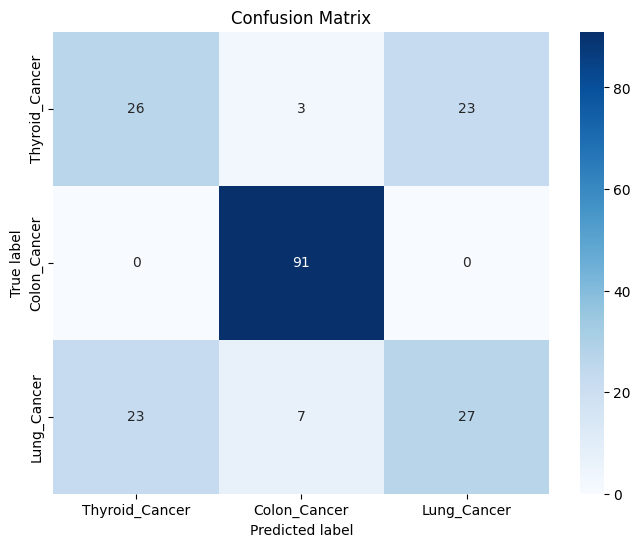

In [348]:
plot_confusion_matrix(y_test, y_pred_lr)

In [349]:
print(classification_report(y_test, y_pred_lr))

                precision    recall  f1-score   support

  Colon_Cancer       0.53      0.50      0.51        52
   Lung_Cancer       0.90      1.00      0.95        91
Thyroid_Cancer       0.54      0.47      0.50        57

      accuracy                           0.72       200
     macro avg       0.66      0.66      0.66       200
  weighted avg       0.70      0.72      0.71       200



**Naive Bayes (MultinomialNB)**

In [350]:
multiNB_model = MultinomialNB(alpha=1.0)
multiNB_model.fit(X_train_tfidf, y_train)
y_pred_nb = multiNB_model.predict(X_test_tfidf)

In [351]:
score_metrics(y_test, y_pred_nb)

accuracy = 0.505, precision = 0.663, recall = 0.395


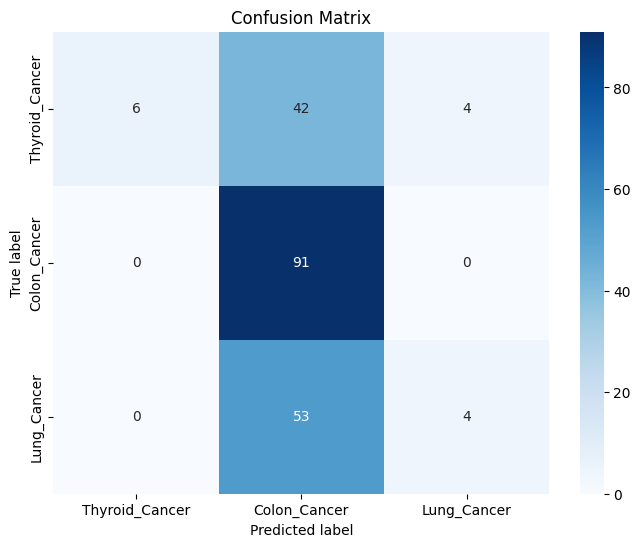

In [352]:
plot_confusion_matrix(y_test, y_pred_nb)

In [353]:
print(classification_report(y_test, y_pred_nb))

                precision    recall  f1-score   support

  Colon_Cancer       1.00      0.12      0.21        52
   Lung_Cancer       0.49      1.00      0.66        91
Thyroid_Cancer       0.50      0.07      0.12        57

      accuracy                           0.51       200
     macro avg       0.66      0.40      0.33       200
  weighted avg       0.63      0.51      0.39       200



**Support Vector Machine**

In [354]:
svc_model = SVC(kernel='linear')
svc_model.fit(X_train_tfidf, y_train)
y_pred_svc = svc_model.predict(X_test_tfidf)

In [355]:
score_metrics(y_test, y_pred_svc)

accuracy = 0.750, precision = 0.697, recall = 0.697


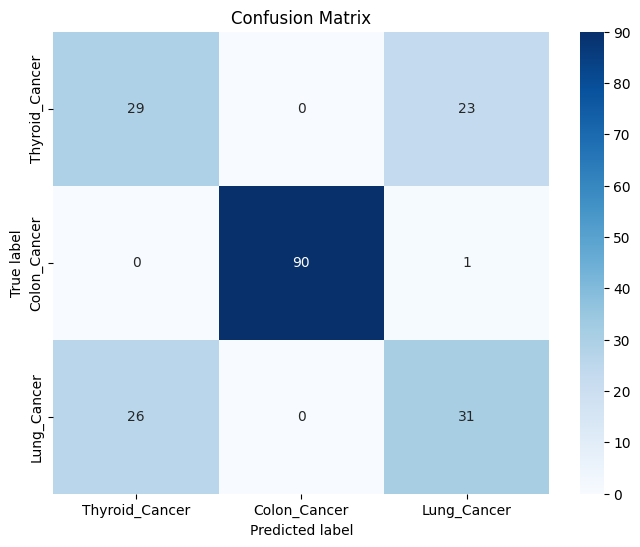

In [356]:
plot_confusion_matrix(y_test, y_pred_svc)

In [357]:
print(classification_report(y_test, y_pred_svc))

                precision    recall  f1-score   support

  Colon_Cancer       0.53      0.56      0.54        52
   Lung_Cancer       1.00      0.99      0.99        91
Thyroid_Cancer       0.56      0.54      0.55        57

      accuracy                           0.75       200
     macro avg       0.70      0.70      0.70       200
  weighted avg       0.75      0.75      0.75       200



In [358]:
endTime = time.time()
print(f'Run Time: {endTime - startTime:.2f}s')

Run Time: 141.37s
